##### Câu hỏi: Dự đoán số lượng hàng bán của sản phẩm dựa vào đánh giá, số lượng đánh giá.
##### Khi trả lời được câu hỏi:
- Tối ưu hóa chiến lược bán hàng: Dự đoán số lượng bán giúp bạn đưa ra quyết định chiến lược bán hàng tốt hơn, chẳng hạn như giá sản phẩm hoặc các chiến dịch quảng cáo.
- Đánh giá hiệu suất mô hình: So sánh các mô hình học máy giúp bạn chọn ra mô hình tốt nhất cho bài toán dự đoán số lượng bán.
##### Cách làm

In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Load training and test data
train_file_path = '../data/processed/train_data.csv'
test_file_path = '../data/processed/test_data.csv'

In [5]:
# read training and test data
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [6]:
# check data
print("Train data head:", train_data.head())
print("Test data head:", test_data.head())

Train data head:                                         product_name  rating  comment_count  \
0             Laptop giá rẻ phục vụ online, giải trí     4.7       0.010290   
1  Bàn Chải Điện Làm Trắng Răng Halio Sonic White...     4.9       0.047412   
2  Sạc nhanh 120W, Củ sạc + Cáp sạc nhanh USB to ...     4.9       0.020123   
3  Robot hút bụi cao cấp Sweepin,Máy Hút Bụi Tự Đ...     4.9       0.003659   
4  Củ sạc Sạc nhanh 33W OPPO / Củ cáp sạc nhanh O...     4.9       0.003201   

      price      sold  
0  0.090962  0.002309  
1  0.041828  0.026600  
2  0.003156  0.007514  
3  0.013108  0.000586  
4  0.001872  0.001163  
Test data head:                                         product_name  rating  comment_count  \
0            [QT KHÔNG BÁN] Máy đo huyết áp Glucerna     5.0       0.000457   
1  XiaoZhubangchu Máy Lọc Không Khí Máy Khử Trùng...     0.0       0.000000   
2  Máy chơi game cầm tay Ps5, Bluetooth v5.1, Pin...     0.0       0.000000   
3  【Miễn phí vận chuyển】Đèn học 

In [7]:
# Setup X train and y train
X_train = train_data[['comment_count', 'rating']]
y_train = train_data['sold']

In [8]:
# Setup X_test and y_test
X_test = test_data[['comment_count', 'rating']]
y_test = test_data['sold']

In [9]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVM": SVR()
}

In [10]:
# Hyperparameters to tune
param_grids = {
    "Linear Regression": {},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [11]:
results = {}
for model_name, model in models.items():
    print(f"Training model: {model_name}")
    param_grid = param_grids[model_name]
    
    # Hyperparameter Tuning with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Get the optimal model
    best_model = grid_search.best_estimator_
    
    # Model prediction and evaluation
    y_pred = best_model.predict(X_test)
    
    # Calculate the indexes
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save result
    results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Show result
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"R2: {metrics['R2']:.4f}")

Training model: Linear Regression
Training model: Random Forest


c:\Users\luong\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\luong\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training model: Gradient Boosting


c:\Users\luong\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training model: SVM

Model: Linear Regression
Best Parameters: {}
MSE: 0.0004
RMSE: 0.0198
MAE: 0.0108
R2: 0.5032

Model: Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
MSE: 0.0006
RMSE: 0.0244
MAE: 0.0117
R2: 0.2463

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
MSE: 0.0005
RMSE: 0.0226
MAE: 0.0117
R2: 0.3568

Model: SVM
Best Parameters: {'C': 10, 'kernel': 'rbf'}
MSE: 0.0085
RMSE: 0.0920
MAE: 0.0905
R2: -9.6814


c:\Users\luong\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


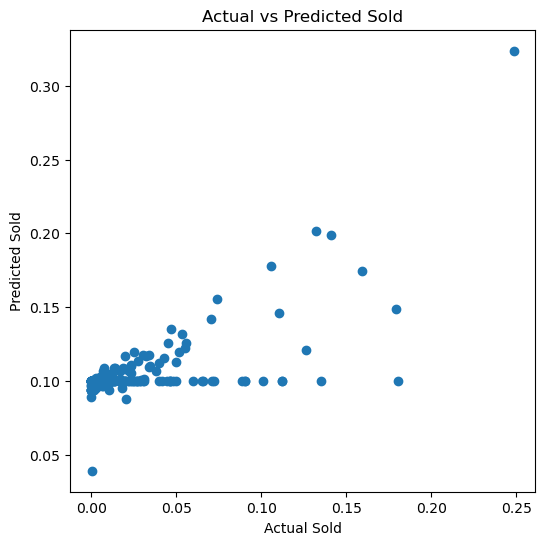

In [12]:
# Visualize the predicted vs actual sold values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sold')
plt.ylabel('Predicted Sold')
plt.title('Actual vs Predicted Sold')
plt.show()

#### Từ kết quả nhận được có thể thấy mô hình hồi quy tuyến tính đưa ra kết quả với độ chính xác tốt nhất. Đây là mô hình tốt nhất có thể dùng để giải quyết câu hỏi được đưa ra.